# Clasificación de textos cortos en emociones

## Contexto:
El análisis de sentimientos es un área que genera valor en múltiples industrias. Usualmente se utilizan técnicas de NLP para clasificar rápidamente textos en un sentimiento positivo, negativo o neutral. Sin embargo, esta clasificación es bastante limitada y no permite un entendimiento profundo. Por esto, se requiere clasificar textos cortos en un espectro de emociones.

Para este caso se abordan las emociones desde un punto de vista clásico en el cual se clasifican en 7 emociones principales: 
1) `shame` = vergüenza
2) `sadness` = tristeza
3) `joy` = alegría
4) `guilt` = culpa
5) `fear` = miedo
6) `disgust` = asco
7) `anger` = ira

Se utiliza el conjunto de datos **ISEAR**, que consiste de 7666 encuestas realizadas por múltiples psicológos en los años 90 en varios países. La encuesta consistía en presentarle una emoción al entrevistado y este debía responder una situación que representara dicha emoción. Este dataset fue elegido porque ha sido ampliamente utilizado para entrenar y comparar el rendimiento de modelos en la detección de emociones.

## Objetivo:
El objetivo de este Notebook es evaluar el rendimiento de diferentes modelos para la clasificación del texto en emociones.

## Procedimiento:
Se van a evaluar el rendimiento de modelos correspondientes a diferentes técnicas: técnicas de **machine learning**, técnicas de **redes neuronales** y **transformers**

## 0. Libraries and input data

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import gensim.downloader as api
from gensim.models import KeyedVectors

In [5]:
df = pd.read_parquet("../data/cleaned/isear_cleaned.parquet")
df.head(3)

,text,emotion
0,when a boy tried to fool me so he would be ok ...,anger
1,i felt anger when i saw that i was being misle...,anger
2,once a friend had pushed me and i had fallen o...,anger


## 1. Técnicas de Machine Learning

Se van a utilizar los modelos de `support vector machine`, `decision tree classifier` y `random forests classifier` para realizar un proceso de clasificación multiclase.

### Libraries

### Split dataset into train, test and validation

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supongamos que df_cleaned contiene las columnas 'text' y 'emotion'
X = df['text']
y = df['emotion']

# Dividimos los datos en entrenamiento (60%), validación (20%) y prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


#### Support Vector Classifier (SVC)

/home/dalopeza/TrabajoGradosEAFIT/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
320 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dalopeza/TrabajoGradosEAFIT/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dalopeza/TrabajoGradosEAFIT/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dalopeza/TrabajoGradosE

Best Model Parameters: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'vectorizer': TfidfVectorizer(max_features=5000)}
Validation Classification Report:
              precision    recall  f1-score   support

       anger       0.45      0.56      0.50       108
     disgust       0.63      0.60      0.61       107
        fear       0.73      0.74      0.74       108
       guilt       0.50      0.50      0.50       107
         joy       0.74      0.70      0.72       109
     sadness       0.58      0.50      0.54       108
       shame       0.50      0.48      0.49       106

    accuracy                           0.58       753
   macro avg       0.59      0.58      0.59       753
weighted avg       0.59      0.58      0.59       753



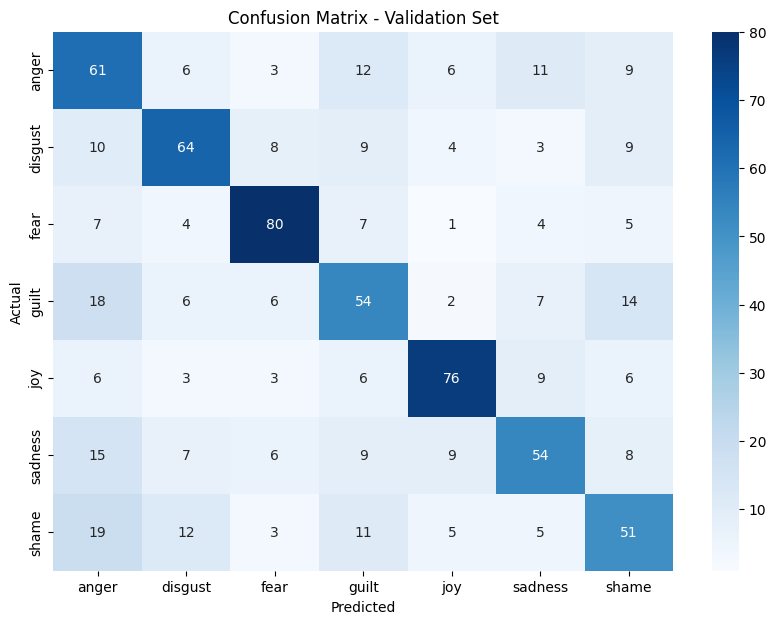

Validation Metrics DataFrame:


,Model,Validation Macro Accuracy,Validation Macro Precision,Validation Macro Recall,Validation Macro F1-Score,Best Parameters
0,SVM,0.584329,0.589776,0.58382,0.585253,"{'classifier__C': 10, 'classifier__class_weigh..."


Test Classification Report:
              precision    recall  f1-score   support

       anger       0.44      0.50      0.47       109
     disgust       0.57      0.64      0.60       107
        fear       0.76      0.71      0.73       109
       guilt       0.42      0.43      0.43       106
         joy       0.78      0.73      0.76       109
     sadness       0.63      0.55      0.59       108
       shame       0.45      0.44      0.45       106

    accuracy                           0.57       754
   macro avg       0.58      0.57      0.57       754
weighted avg       0.58      0.57      0.57       754



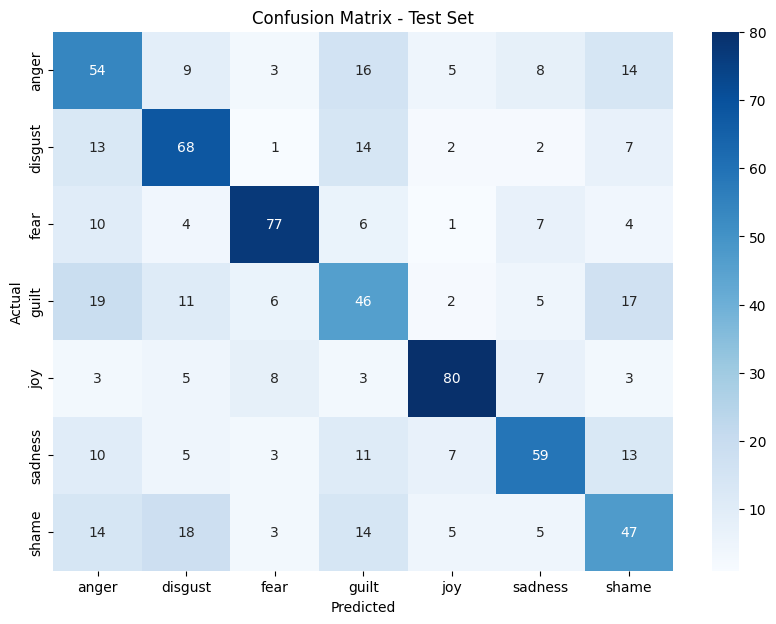

Test Metrics DataFrame:


,Model,Validation Macro Accuracy,Validation Macro Precision,Validation Macro Recall,Validation Macro F1-Score,Best Parameters
0,SVM,0.584329,0.589776,0.58382,0.585253,"{'classifier__C': 10, 'classifier__class_weigh..."


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import gensim.downloader as api
from gensim.models import Word2Vec
import numpy as np


class Word2VecVectorizer:
    def __init__(self, model):
        self.model = model
        self.vector_size = model.vector_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array(
            [
                np.mean(
                    [self.model[w] for w in words if w in self.model]
                    or [np.zeros(self.vector_size)],
                    axis=0,
                )
                for words in X.str.split()
            ]
        )


# Cargar modelos Word2Vec y GloVe
word2vec_model = Word2Vec(
    sentences=[text.split() for text in X_train],
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
)
glove_model = api.load(
    "glove-wiki-gigaword-100"
)  # Esto carga un modelo pre-entrenado de GloVe con 100 dimensiones

# Crear transformadores para Word2Vec y GloVe
word2vec_transformer = Word2VecVectorizer(word2vec_model)
glove_transformer = Word2VecVectorizer(glove_model)

# Definir vectorizadores adicionales
vectorizers = {
    "tfidf": TfidfVectorizer(max_features=5000),
    "count": CountVectorizer(max_features=5000),
    "word2vec": word2vec_transformer,
    "glove": glove_transformer,
}

# Definir el pipeline
pipeline = Pipeline(
    [
        ("vectorizer", TfidfVectorizer()),  # Placeholder
        ("classifier", SVC()),
    ]
)

# Extender los parámetros para la búsqueda en cuadrícula
param_grid = [
    {
        "vectorizer": [
            vectorizers["tfidf"],
            vectorizers["count"],
            vectorizers["word2vec"],
            vectorizers["glove"],
        ],
        "classifier__C": [0.1, 1, 10, 100],
        "classifier__kernel": ["linear", "rbf", "poly", "sigmoid"],
        "classifier__gamma": ["scale", "auto"],
        "classifier__class_weight": [None, "balanced"],
    }
]

# Realizar la búsqueda en cuadrícula usando el conjunto de validación
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print("Best Model Parameters:", best_params)

# Evaluar el mejor modelo en el conjunto de validación
y_val_pred = grid_search.best_estimator_.predict(X_val)

# Imprimir el informe de clasificación para el conjunto de validación
val_report = classification_report(y_val, y_val_pred, output_dict=True)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Crear una matriz de confusión con etiquetas para el conjunto de validación
cm_val = confusion_matrix(y_val, y_val_pred, labels=grid_search.classes_)
cm_val_df = pd.DataFrame(
    cm_val, index=grid_search.classes_, columns=grid_search.classes_
)

# Graficar la matriz de confusión para el conjunto de validación
plt.figure(figsize=(10, 7))
sns.heatmap(cm_val_df, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Validation Set")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Extraer métricas generales del conjunto de validación
val_metrics_data = {
    "Model": ["SVM"],
    "Validation Macro Accuracy": [val_report["accuracy"]],
    "Validation Macro Precision": [val_report["macro avg"]["precision"]],
    "Validation Macro Recall": [val_report["macro avg"]["recall"]],
    "Validation Macro F1-Score": [val_report["macro avg"]["f1-score"]],
    "Best Parameters": [best_params],  # Agregar la mejor combinación de parámetros
}

# Crear un dataframe para almacenar las métricas de validación
val_metrics_df = pd.DataFrame(val_metrics_data)

# Mostrar el dataframe de métricas de validación
print("Validation Metrics DataFrame:")
display(val_metrics_df)

# Finalmente, evaluar el modelo en el conjunto de prueba
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Imprimir el informe de clasificación para el conjunto de prueba
test_report = classification_report(y_test, y_test_pred, output_dict=True)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Crear una matriz de confusión con etiquetas para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_test_pred, labels=grid_search.classes_)
cm_test_df = pd.DataFrame(
    cm_test, index=grid_search.classes_, columns=grid_search.classes_
)

# Graficar la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_df, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Test Set")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Extraer métricas generales del conjunto de prueba
test_metrics_data = {
    "Model": ["SVM"],
    "Test Macro Accuracy": [test_report["accuracy"]],
    "Test Macro Precision": [test_report["macro avg"]["precision"]],
    "Test Macro Recall": [test_report["macro avg"]["recall"]],
    "Test Macro F1-Score": [test_report["macro avg"]["f1-score"]],
    "Best Parameters": [best_params],  # Agregar la mejor combinación de parámetros
}

# Crear un dataframe para almacenar las métricas de prueba
test_metrics_df = pd.DataFrame(test_metrics_data)

# Mostrar el dataframe de métricas de prueba
print("Test Metrics DataFrame:")
display(val_metrics_df)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import gensim.downloader as api
from gensim.models import Word2Vec
import numpy as np


class Word2VecVectorizer:
    def __init__(self, model):
        self.model = model
        self.vector_size = model.vector_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array(
            [
                np.mean(
                    [self.model[w] for w in words if w in self.model]
                    or [np.zeros(self.vector_size)],
                    axis=0,
                )
                for words in X.str.split()
            ]
        )


# Cargar modelos Word2Vec y GloVe
word2vec_model = Word2Vec(
    sentences=[text.split() for text in X_train],
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
)
glove_model = api.load(
    "glove-wiki-gigaword-100"
)  # Esto carga un modelo pre-entrenado de GloVe con 100 dimensiones

# Crear transformadores para Word2Vec y GloVe
word2vec_transformer = Word2VecVectorizer(word2vec_model)
glove_transformer = Word2VecVectorizer(glove_model)

# Definir vectorizadores adicionales
vectorizers = {
    "tfidf": TfidfVectorizer(max_features=5000),
    "count": CountVectorizer(max_features=5000),
    "word2vec": word2vec_transformer,
    "glove": glove_transformer,
}

# Definir el pipeline
pipeline = Pipeline(
    [
        ("vectorizer", TfidfVectorizer()),  # Placeholder
        ("classifier", SVC()),
    ]
)

# Extender los parámetros para la búsqueda en cuadrícula
param_grid = [
    {
        "vectorizer": [
            vectorizers["tfidf"],
            vectorizers["count"],
            vectorizers["word2vec"],
            vectorizers["glove"],
        ],
        "classifier__C": [0.1, 1, 10, 100],
        "classifier__kernel": ["linear", "rbf", "poly", "sigmoid"],
        "classifier__gamma": ["scale", "auto"],
        "classifier__class_weight": [None, "balanced"],
    }
]

# Realizar la búsqueda en cuadrícula usando el conjunto de validación
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluar el mejor modelo en el conjunto de validación
y_val_pred = grid_search.best_estimator_.predict(X_val)

# Imprimir el informe de clasificación para el conjunto de validación
val_report = classification_report(y_val, y_val_pred, output_dict=True)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Crear una matriz de confusión con etiquetas para el conjunto de validación
cm_val = confusion_matrix(y_val, y_val_pred, labels=grid_search.classes_)
cm_val_df = pd.DataFrame(
    cm_val, index=grid_search.classes_, columns=grid_search.classes_
)

# Graficar la matriz de confusión para el conjunto de validación
plt.figure(figsize=(10, 7))
sns.heatmap(cm_val_df, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Validation Set")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Extraer métricas generales del conjunto de validación
val_metrics_data = {
    "Model": ["SVM"],
    "Validation Macro Accuracy": [val_report["accuracy"]],
    "Validation Macro Precision": [val_report["macro avg"]["precision"]],
    "Validation Macro Recall": [val_report["macro avg"]["recall"]],
    "Validation Macro F1-Score": [val_report["macro avg"]["f1-score"]],
}

# Crear un dataframe para almacenar las métricas de validación
val_metrics_df = pd.DataFrame(val_metrics_data)

# Mostrar el dataframe de métricas de validación
print("Validation Metrics DataFrame:")
val_metrics_df.head()

# Finalmente, evaluar el modelo en el conjunto de prueba
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Imprimir el informe de clasificación para el conjunto de prueba
test_report = classification_report(y_test, y_test_pred, output_dict=True)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Crear una matriz de confusión con etiquetas para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_test_pred, labels=grid_search.classes_)
cm_test_df = pd.DataFrame(
    cm_test, index=grid_search.classes_, columns=grid_search.classes_
)

# Graficar la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_df, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Test Set")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Extraer métricas generales del conjunto de prueba
test_metrics_data = {
    "Model": ["SVM"],
    "Test Macro Accuracy": [test_report["accuracy"]],
    "Test Macro Precision": [test_report["macro avg"]["precision"]],
    "Test Macro Recall": [test_report["macro avg"]["recall"]],
    "Test Macro F1-Score": [test_report["macro avg"]["f1-score"]],
}

# Crear un dataframe para almacenar las métricas de prueba
test_metrics_df = pd.DataFrame(test_metrics_data)

# Mostrar el dataframe de métricas de prueba
print("Test Metrics DataFrame:")
test_metrics_df.head()


KeyboardInterrupt: 

##### Pipeline and GridSearch

In [34]:
class Word2VecVectorizer:
    def __init__(self, model):
        self.model = model
        self.vector_size = model.vector_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.model[w] for w in words if w in self.model]
                    or [np.zeros(self.vector_size)], axis=0)
            for words in X.str.split()
        ])

# Load Word2Vec or GloVe model
word2vec_model = Word2Vec(sentences=[text.split() for text in X], vector_size=100, window=5, min_count=1, workers=4)
glove_model = api.load('glove-wiki-gigaword-100')  # Esto carga un modelo pre-entrenado de GloVe con 100 dimensiones


# Create transformers for Word2Vec and GloVe
word2vec_transformer = Word2VecVectorizer(word2vec_model)
glove_transformer = Word2VecVectorizer(glove_model)


In [35]:
# Define additional vectorizers
vectorizers = {
    "tfidf": TfidfVectorizer(max_features=5000),
    "count": CountVectorizer(max_features=5000),
    "word2vec": word2vec_transformer,
    "glove": glove_transformer
}

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Placeholder
    ('classifier', SVC())
])

# Extend the parameters for grid search
param_grid = [
    {
        'vectorizer': [vectorizers['tfidf'], vectorizers['count'], vectorizers['word2vec'], vectorizers['glove']],
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'classifier__gamma': ['scale', 'auto'],
        'classifier__class_weight': [None, 'balanced']
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


KeyboardInterrupt: 

Classification Report:
              precision    recall  f1-score   support

       anger       0.35      0.44      0.39       435
     disgust       0.47      0.52      0.49       428
        fear       0.63      0.52      0.57       433
       guilt       0.39      0.46      0.42       426
         joy       0.63      0.58      0.61       436
     sadness       0.64      0.49      0.55       432
       shame       0.39      0.38      0.38       424

    accuracy                           0.48      3014
   macro avg       0.50      0.48      0.49      3014
weighted avg       0.50      0.48      0.49      3014



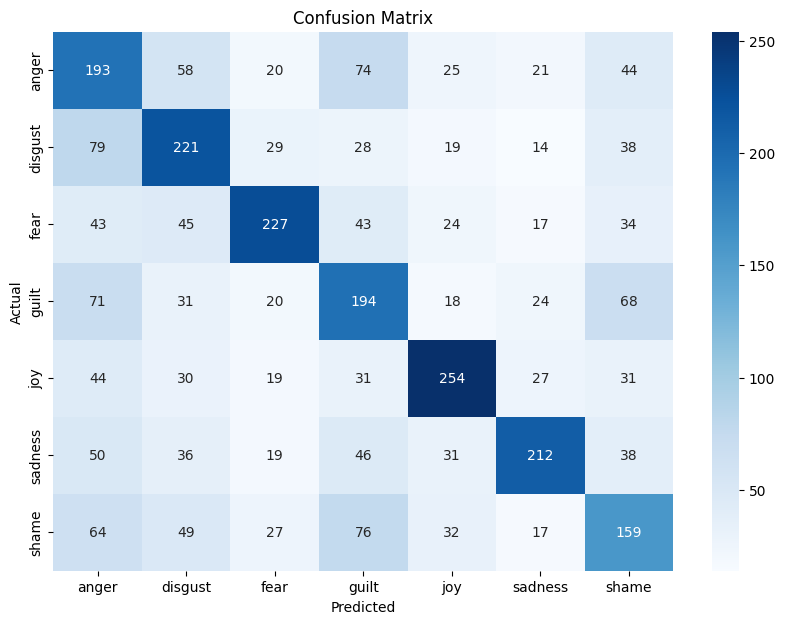

Metrics DataFrame:


,Model,Macro Accuracy,Macro Precision,Macro Recall,Macro F1-Score
0,SVM,0.484406,0.500408,0.483999,0.488824


In [32]:
# Predict on the test set with the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix with labels instead of numbers
cm = confusion_matrix(y_test, y_pred, labels=grid_search.classes_)
cm_df = pd.DataFrame(cm, index=grid_search.classes_, columns=grid_search.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Extract overall metrics
metrics_data = {
    "Model": ["SVM"],
    "Macro Accuracy": [report['accuracy']],
    "Macro Precision": [report['macro avg']['precision']],
    "Macro Recall": [report['macro avg']['recall']],
    "Macro F1-Score": [report['macro avg']['f1-score']]
}

# Create a dataframe to store the metrics
metrics_df = pd.DataFrame(metrics_data)

# Display the metrics dataframe
print("Metrics DataFrame:")
metrics_df.head()


In [20]:
# Define vectorizers and their names
vectorizers = {
    "tfidf": TfidfVectorizer(max_features=5000),
    "count": CountVectorizer(max_features=5000),
    "hashing": HashingVectorizer(n_features=5000)
}

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Placeholder, will be overridden in grid search
    ('classifier', SVC())
])

# Define the parameters for grid search
param_grid = [
    {
        'vectorizer': [vectorizers['tfidf'], vectorizers['count'], vectorizers['hashing']],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto']
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid=[{'classifier__C': [0.1, 1, 10],
                          'classifier__gamma': ['scale', 'auto'],
                          'classifier__kernel': ['linear', 'rbf', 'poly'],
                          'vectorizer': [TfidfVectorizer(max_features=5000),
                                         CountVectorizer(max_features=5000),
                                         HashingVectorizer(n_features=5000)]}],
             scoring='accuracy')

##### Evaluate best model

Classification Report:
              precision    recall  f1-score   support

       anger       0.35      0.44      0.39       435
     disgust       0.47      0.52      0.49       428
        fear       0.63      0.52      0.57       433
       guilt       0.39      0.45      0.42       426
         joy       0.63      0.58      0.61       436
     sadness       0.64      0.49      0.55       432
       shame       0.39      0.38      0.38       424

    accuracy                           0.48      3014
   macro avg       0.50      0.48      0.49      3014
weighted avg       0.50      0.48      0.49      3014



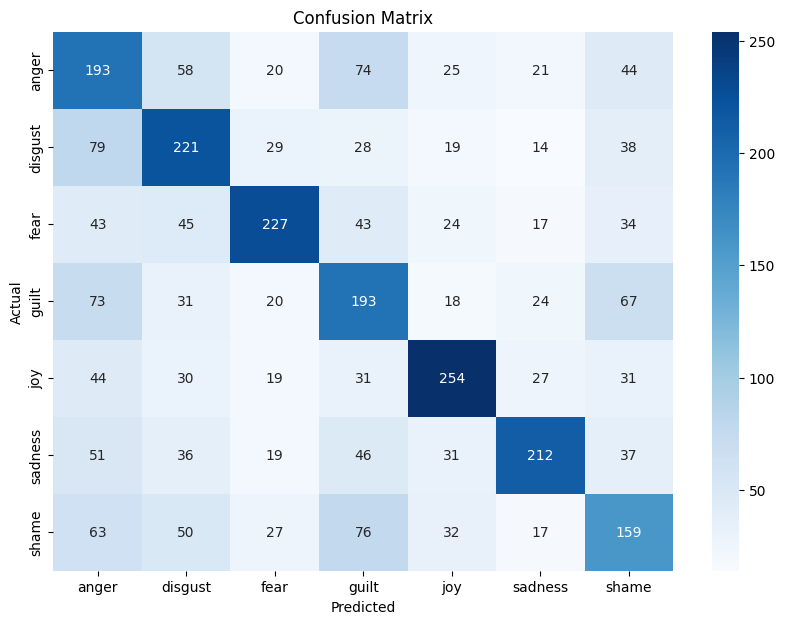

Metrics DataFrame:


,Model,Macro Accuracy,Macro Precision,Macro Recall,Macro F1-Score
0,SVC,0.484074,0.500173,0.483663,0.488516


In [23]:
# Predict on the test set with the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix with labels instead of numbers
cm = confusion_matrix(y_test, y_pred, labels=grid_search.classes_)
cm_df = pd.DataFrame(cm, index=grid_search.classes_, columns=grid_search.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Extract overall metrics
metrics_data = {
    "Model": ["SVC"],
    "Macro Accuracy": [report['accuracy']],
    "Macro Precision": [report['macro avg']['precision']],
    "Macro Recall": [report['macro avg']['recall']],
    "Macro F1-Score": [report['macro avg']['f1-score']]
}

# Create a dataframe to store the metrics
metrics_df = pd.DataFrame(metrics_data)

# Display the metrics dataframe
print("Metrics DataFrame:")
metrics_df.head()


### Evaluation